In [4]:
import numpy as np
import matplotlib.pyplot as plt

#keras importing
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Normalization

#dataset
from tensorflow.keras.datasets import mnist

In [5]:
# Loading data

In [6]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()
for data in [X_train, y_train, X_test, y_test]:
    data = data/255

11493376/11490434 [==============================] - 2s 0us/step


In [22]:
# checking data shapes

In [23]:
print("shape of training data is {}".format(X_train.shape))
print("shape of testing data is {}".format(X_test.shape))

shape of training data is (60000, 28, 28)
shape of testing data is (10000, 28, 28)


In [24]:
# checking labels

In [32]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
# checking input and labels

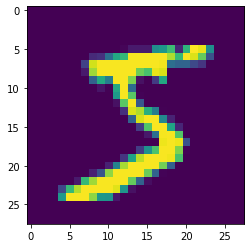

Label for image: 5


In [38]:
plt.imshow(X_train[0])
plt.show()

print("Label for image: {}".format(y_train[0]))

In [39]:
# defining  model

In [42]:
input_data =  Input((28, 28), name='input')
x = Flatten()(input_data)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=input_data, outputs=outputs)

In [43]:
# compining model

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# tarining

In [46]:
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 1s 682us/step - loss: 0.4681 - accuracy: 0.8737
Epoch 2/10
938/938 [==============================] - 1s 704us/step - loss: 0.1969 - accuracy: 0.9419
Epoch 3/10
938/938 [==============================] - 1s 663us/step - loss: 0.1562 - accuracy: 0.9536
Epoch 4/10
938/938 [==============================] - 1s 692us/step - loss: 0.1328 - accuracy: 0.9594
Epoch 5/10
938/938 [==============================] - 1s 663us/step - loss: 0.1180 - accuracy: 0.9644
Epoch 6/10
938/938 [==============================] - 1s 660us/step - loss: 0.1060 - accuracy: 0.9677
Epoch 7/10
938/938 [==============================] - 1s 661us/step - loss: 0.0972 - accuracy: 0.9699
Epoch 8/10
938/938 [==============================] - 1s 656us/step - loss: 0.0894 - accuracy: 0.9721
Epoch 9/10
938/938 [==============================] - 1s 696us/step - loss: 0.0850 - accuracy: 0.9734
Epoch 10/10
938/938 [==============================] - 1s 664us/step - loss: 0.079

In [47]:
# model evaluation

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 391us/step - loss: 0.1108 - accuracy: 0.9676


[0.11075609177350998, 0.9675999879837036]

In [50]:
# testing

6


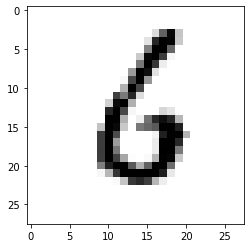

In [51]:
prediction = model.predict(X_test)[50]
print(np.argmax(prediction))
plt.imshow(X_test[50], cmap='binary')